In [72]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heart-disease-prediction-dataset/Heart_Disease_Prediction.csv


In [73]:
df = pd.read_csv("/kaggle/input/heart-disease-prediction-dataset/Heart_Disease_Prediction.csv")
       

# Initial Inspection

In [74]:
print(df.shape)
df.sample(6)   

(270, 14)


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
134,54,1,3,150,232,0,2,165,0,1.6,1,0,7,Absence
241,39,1,3,140,321,0,2,182,0,0.0,1,0,3,Absence
144,54,1,2,192,283,0,2,195,0,0.0,1,1,7,Presence
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
161,62,0,4,150,244,0,0,154,1,1.4,2,0,3,Presence
198,69,0,1,140,239,0,0,151,0,1.8,1,2,3,Absence


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [76]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


# Exploratory Data Analysis (EDA)

1. Target Distribution.
   
2. Age Distribution.

3. Sex vs Heart Disease (Sex: 1=male, 0=female).

4. Chest Pain Type vs Heart Disease.

5. Max Heart Rate vs Heart Disease.

6. Cholesterol vs Heart Disease.

7. Correlation Heatmap.

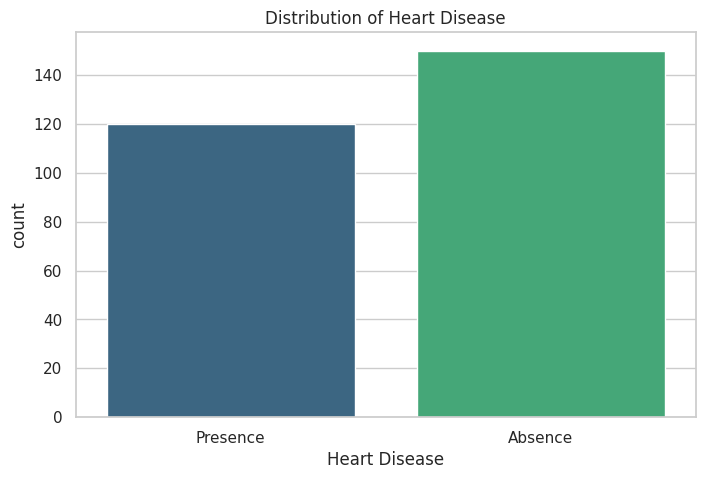

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


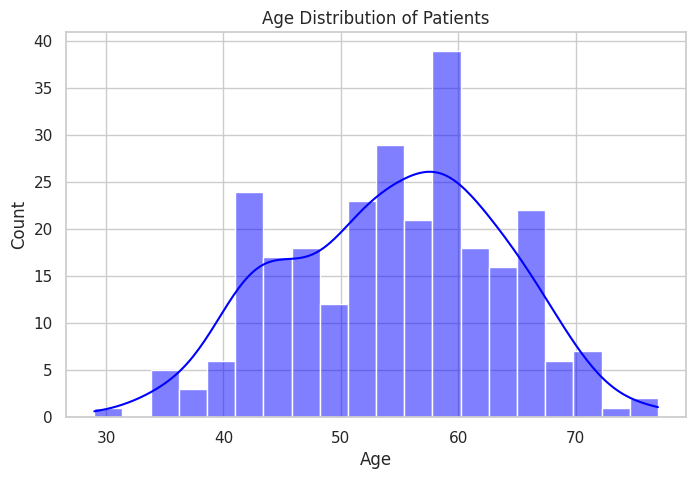

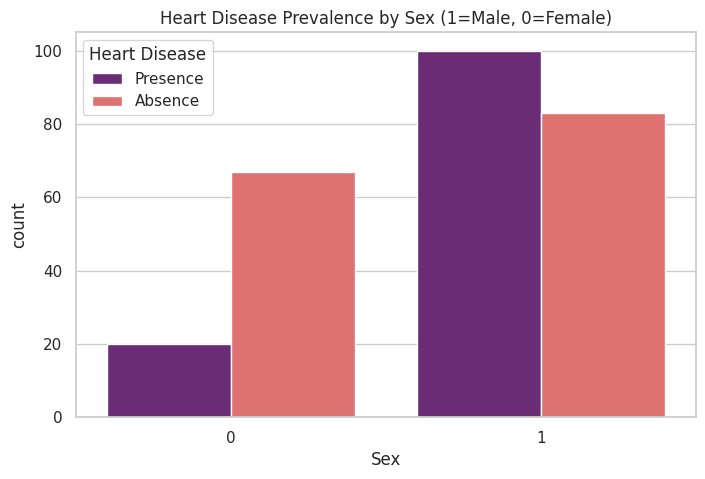

In [77]:
#1)
plt.figure(figsize=(8, 5))
sns.countplot(x='Heart Disease', data=df, palette='viridis')
plt.title('Distribution of Heart Disease')
plt.show()

#2)
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution of Patients')
plt.show()

#3)
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', hue='Heart Disease', data=df, palette='magma')
plt.title('Heart Disease Prevalence by Sex (1=Male, 0=Female)')
plt.show()

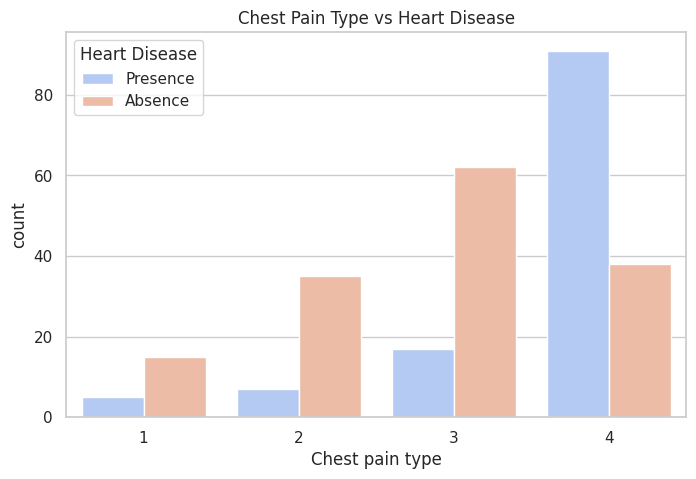

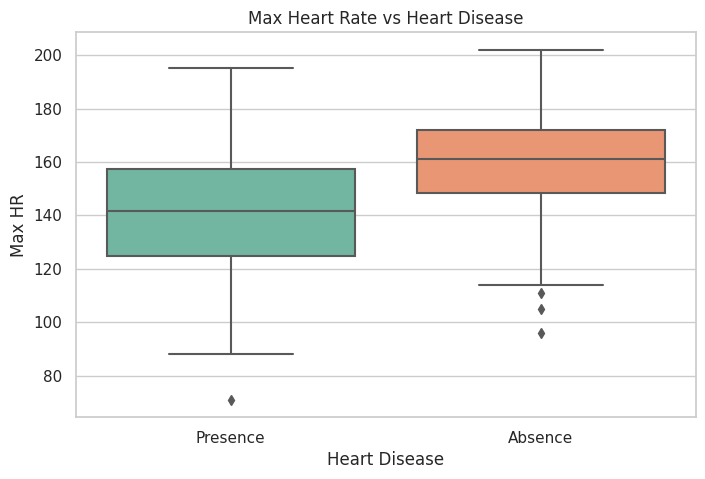

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

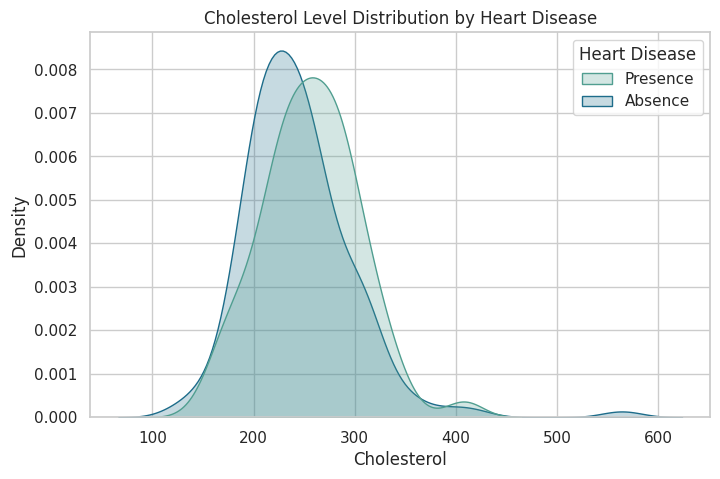

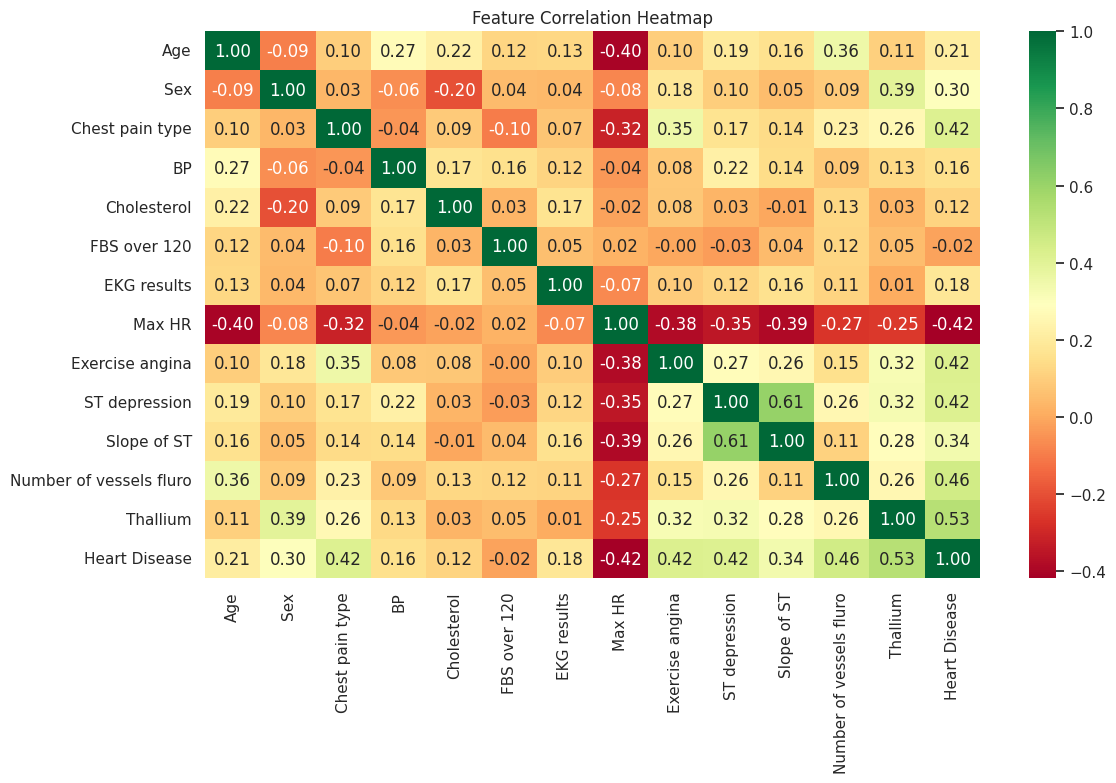

In [78]:
#4)
plt.figure(figsize=(8, 5))
sns.countplot(x='Chest pain type', hue='Heart Disease', data=df, palette='coolwarm')
plt.title('Chest Pain Type vs Heart Disease')
plt.show()

#5)
plt.figure(figsize=(8, 5))
sns.boxplot(x='Heart Disease', y='Max HR', data=df, palette='Set2')
plt.title('Max Heart Rate vs Heart Disease')
plt.show()

#6)
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x='Cholesterol', hue='Heart Disease', fill=True, common_norm=False, palette='crest')
plt.title('Cholesterol Level Distribution by Heart Disease')
plt.show()

#7)
from sklearn.preprocessing import LabelEncoder
plt.figure(figsize=(12, 8))
df_encoded = df.copy()
df_encoded['Heart Disease'] = LabelEncoder().fit_transform(df_encoded['Heart Disease'])
sns.heatmap(df_encoded.corr(), annot=True, cmap='RdYlGn', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

# Features and Model Preparation

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import xgboost as xgb

le = LabelEncoder()
df['Heart Disease'] = le.fit_transform(df['Heart Disease']) #Absence=0, Presence=1

X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']

# 3 Models
1. Random forest classifier.
2. Gradient boost classifier.
3. XG boost classifier. (best)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)

#Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train_scaled, y_train)
gb_pred = gb_model.predict(X_test_scaled)

#xgboost
xgb_model = xgb.XGBClassifier(n_estimators=100,learning_rate=0.1,max_depth=3,use_label_encoder=False,eval_metric='logloss',random_state=42)
xgb_model.fit(X_train_scaled, y_train)
xgb_pred = xgb_model.predict(X_test_scaled)

# Model Evaluation

In [81]:
#Results
print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_pred):.4f}")
print(f"Gradient Boosting Accuracy: {accuracy_score(y_test, gb_pred):.4f}")
print(f"XG Boosting Accuracy: {accuracy_score(y_test, xgb_pred):.4f}")
print("\nRandom Forest report Report:\n", classification_report(y_test, rf_pred))
print("\nGradient Boosting Report:\n", classification_report(y_test, gb_pred))
print("\nXG Boosting Report:\n", classification_report(y_test, xgb_pred))

Random Forest Accuracy: 0.7593
Gradient Boosting Accuracy: 0.7593
XG Boosting Accuracy: 0.8889

Random Forest report Report:
               precision    recall  f1-score   support

           0       0.78      0.85      0.81        33
           1       0.72      0.62      0.67        21

    accuracy                           0.76        54
   macro avg       0.75      0.73      0.74        54
weighted avg       0.76      0.76      0.76        54


Gradient Boosting Report:
               precision    recall  f1-score   support

           0       0.78      0.85      0.81        33
           1       0.72      0.62      0.67        21

    accuracy                           0.76        54
   macro avg       0.75      0.73      0.74        54
weighted avg       0.76      0.76      0.76        54


XG Boosting Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91        33
           1       0.94      0.76      0.84        21

    ac

# Model Comparison

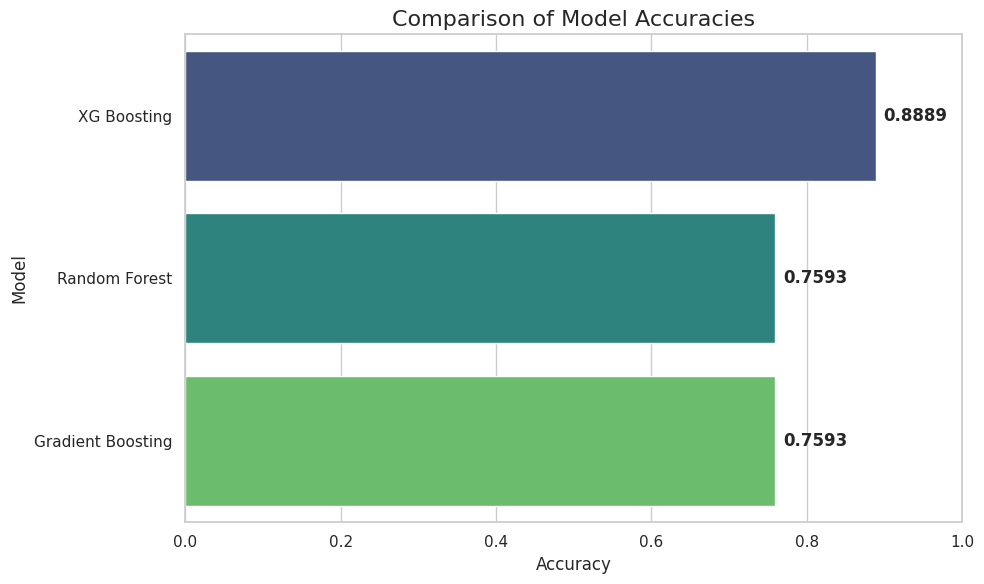

In [82]:
data = {
    'Model': ['Random Forest', 'Gradient Boosting', 'XG Boosting'],
    'Accuracy': [0.7593, 0.7593, 0.8889]}
df = pd.DataFrame(data).sort_values(by='Accuracy', ascending=False)

plt.figure(figsize=(10, 6))
plot = sns.barplot(x='Accuracy', y='Model', data=df, palette='viridis')
plt.title('Comparison of Model Accuracies', fontsize=16)
plt.xlabel('Accuracy', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.xlim(0, 1.0)
for index, value in enumerate(df['Accuracy']):
    plt.text(value + 0.01, index, f'{value:.4f}', va='center', fontweight='bold')
plt.tight_layout()
plt.show()

# Feature importance after training

<Figure size 1800x800 with 0 Axes>

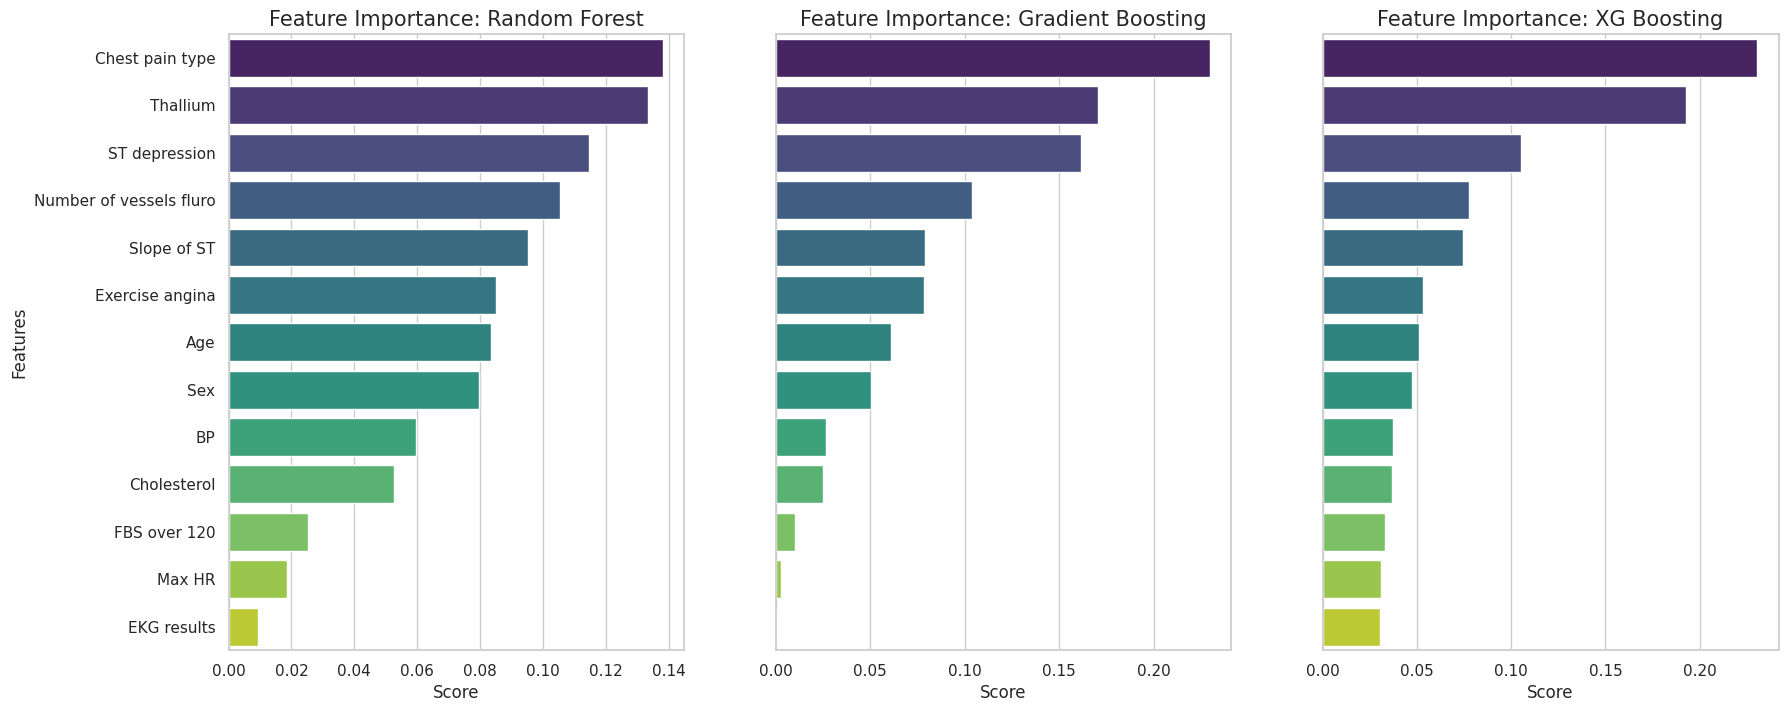

In [83]:
features = ['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 
            'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina', 
            'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium']

rf_importance = pd.DataFrame({'Feature': features, 'Importance': rf_model.feature_importances_, 'Model': 'Random Forest'})
gb_importance = pd.DataFrame({'Feature': features, 'Importance': gb_model.feature_importances_, 'Model': 'Gradient Boosting'})
xgb_importance = pd.DataFrame({'Feature': features, 'Importance': xgb_model.feature_importances_, 'Model': 'XG Boosting'})

all_importance = pd.concat([rf_importance, gb_importance, xgb_importance])

plt.figure(figsize=(18, 8))
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(20, 8), sharey=True)

models = [('Random Forest', rf_importance), 
          ('Gradient Boosting', gb_importance), 
          ('XG Boosting', xgb_importance)]

for i, (name, data) in enumerate(models):
    data_sorted = data.sort_values(by='Importance', ascending=False)
    
    sns.barplot(ax=axes[i], x='Importance', y='Feature', data=data_sorted, palette='viridis')
    axes[i].set_title(f'Feature Importance: {name}', fontsize=15)
    axes[i].set_xlabel('Score')
    axes[i].set_ylabel('Features' if i == 0 else '')

plt.show()

# Summary

This notebook presents an end-to-end machine learning or data science approach to predict the likelihood of heart disease based on clinical and demographic features. The workflow begins with loading and exploring the dataset to understand feature distributions, correlations, and potential data quality issues. Necessary preprocessing steps such as handling missing values, encoding categorical variables, and feature scaling are applied to prepare the data for modeling.

Multiple machine learning models are trained and evaluated to compare their performance using appropriate metrics (such as accuracy or related evaluation measures). The results highlight how different features contribute to prediction outcomes and demonstrate the strengths and limitations of each model.